In [1]:
from pyqode.solver import Solver
import numpy as np
from pyqode.nozzle_2d import nasa_cdv_nozzle_verification_geometry
from pyqode.utils import r_to_k, psi_to_pa, meter_to_inch, area_to_radius, inch_to_meter, ft_to_meter, pa_to_psi
import matplotlib.pyplot as plt
from pyqode.solver import PostProcessor, gen_su2_setup, gen_multizone_su2_setup
from pathlib import Path
import numpy as np


In [2]:
def nozzle_yu(x):
    """Yu's nozzle geometry"""
    hi = 0.5
    he = 0.3
    ht = 0.2
    if x <= 0.5:
        A = (hi + ht)/2 - (hi-ht)/2*np.cos(np.pi*(2*x-1))
    elif x > 0.5 and x <= 1:
        A = (he + ht)/2 - (he-ht)/2*np.cos(np.pi*(2*x-1))
    return A

nozzle_yu = np.vectorize(nozzle_yu)

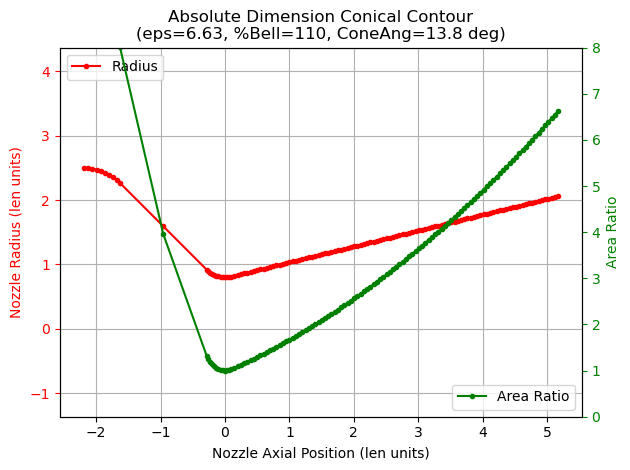

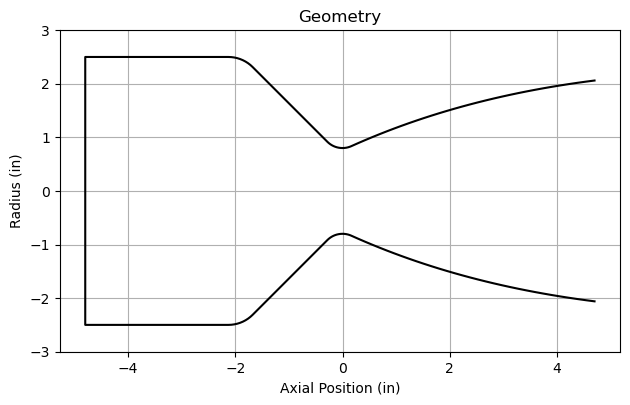

AttributeError: 'Geometry' object has no attribute 'abs_zContour'

In [3]:
from rocketisp.geometry import Geometry
from rocketisp.nozzle.nozzle import Nozzle

G = Nozzle( 
    Rt=0.8,
    CR=9.76, 
    eps=6.63,  
    pcentBell=110,
    Nsegs = 100,
    Rup=0.5, 
    Rd=0.5, 
    cham_conv_ang=45,
    theta=15,
    exitAng=15,
    forceCone=True,
    )
G.plot_geom()

G = Geometry(
    Rthrt=0.8,
    CR=9.76, 
    eps=6.63,  
    pcentBell=100,
    RupThroat=0.5, 
    RdwnThroat=0.5, 
    RchmConv=0.8,
    cham_conv_deg=45,
    LchmMin=1,
    #exitAng=15,
    #forceCone=True,
)

G.plot_geometry()
plt.plot(G.abs_zContour, G.abs_rContour)
#G.plot_geometry( title='SSME Profile', png_name='ssme_geom.png', show_grid=True)

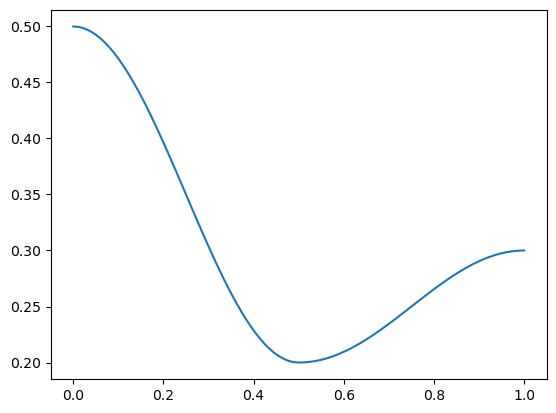

In [ ]:
xn = np.linspace(0, 1, 100)
sn = nozzle_yu(xn)
plt.plot(xn, sn)

In [ ]:
xn, sn = nasa_cdv_nozzle_verification_geometry(npts=100)

rn = area_to_radius(sn)

In [ ]:
PB = 101e3+0*psi_to_pa(0.75)
P0IN = PB/0.89
T0IN = 400+0*r_to_k(100.0)


In [ ]:

config_sajben_nozzle = {
    'working_dir': './1D',
    'domain_x': xn,
    'domain_area': sn,
    'domain_size': 200,
    'bc_p0': P0IN,
    'bc_T0': T0IN ,
    'bc_M': 0.4,
    'bc_pb': PB,
    'fluid_R': 287.0,
    'fluid_gamma': 1.4,
    'solver_itmax': 50000,
    'solver_itprint': 1,
    'solver_CFL': 0.5,
    'solver_tol': 1e-15,
    'solver_tscheme': 'Euler',
    'solver_fscheme': 'AUSM',
    'solver_dttype': 'Global',
    'solver_dim': 'Dimensionless',  
}

#Basic, Roe, Split, SplitTVD, VanLeer, LaxFriedrichs, StegerWarming, AUSM) 
#AUSM

config = config_sajben_nozzle
eq1d = Solver(config = config, executable='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/eulerQ1D')
eq1d.run()

################################################################################
                           -*- Q1D Euler Solver -*-
Eigen 3.3.7
Allan Moreira de Carvalho
################################################################################
                           -*- Setup Information -*-
################################################################################
# Domain x-coordinates at cell faces (no need for ghost cells)
/home/ppiper/Dropbox/local/github/pyqode/examples/nozzle_yu/1D/inputs/xn.txt
# Area distributuin at cell faces (no need for ghost cells)
/home/ppiper/Dropbox/local/github/pyqode/examples/nozzle_yu/1D/inputs/sn.txt
# Inlet Total Pressure [Pa]
113483.14606741573
# Inlet Total Temperature [K]
400.0
# Inlet Mach Number
0.4
# Outlet Static Pressure [Pa]
101000.0
# Gas constant [J/kg/K]
287.0
# Specific heat ratio
1.4
# Maximum number of iterations 
50000
# Interval to print iterations 
1
# CFL number 
0.5
# Convergence criteria 
1e-15
# Time integrat

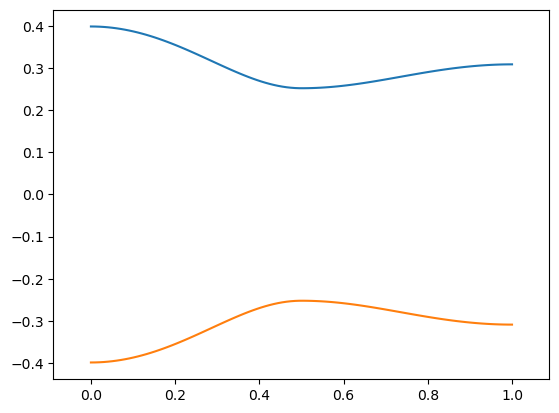

In [ ]:
plt.axis('equal')
plt.plot( config['domain_x'], area_to_radius(config['domain_area']))
plt.plot( config['domain_x'], -area_to_radius(config['domain_area']))

In [ ]:
pp = PostProcessor(f"{config['working_dir']}/outputs")

x
rese
u
p
resrhou
rho
S
e
T
M
resrho
c


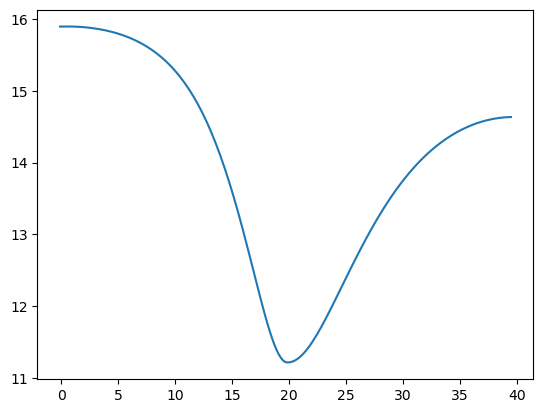

In [ ]:

h_thr = ft_to_meter(0.14435)
plt.plot(meter_to_inch(pp.x),pa_to_psi(pp.p))


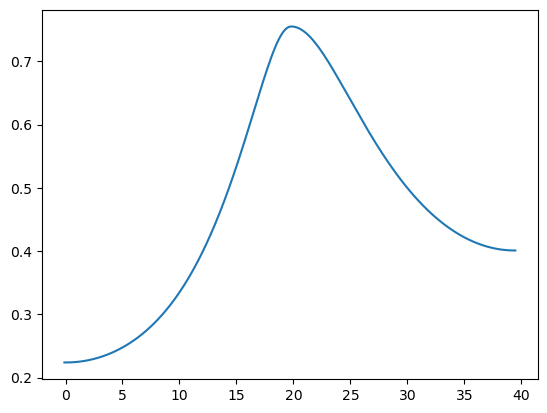

In [ ]:
plt.plot(meter_to_inch(pp.x),pp.M)

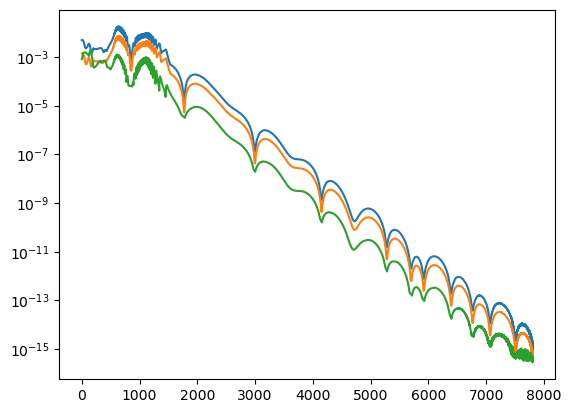

In [ ]:
plt.plot(pp.rese)
plt.plot(pp.resrho)
plt.plot(pp.resrhou)

plt.yscale('log')

In [ ]:
from pyqode.nozzle_2d import gen_nozzle_mesh, gen_wall_mesh, gen_multizone_mesh

In [ ]:
inputs = PostProcessor(f'{config["working_dir"]}/inputs')

xn
sn


In [ ]:
nozzle_mesh_file = gen_nozzle_mesh(
    xn=config['domain_x'],
    rn=area_to_radius(config['domain_area']),
    Nx=50,
    Ny=10,
    inflation_rate=1.2,
    output_file='./2D/mesh/nozzle',
    gmshsolver='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh',
    symmetry=True,
)

Info    : Running '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh 2D/mesh/nozzle.geo -0 -2 -format su2 -o 2D/mesh/nozzle.su2' [Gmsh 4.9.1, 1 node, max. 1 thread]
Info    : Started on Sat Sep 23 15:09:23 2023
Info    : Reading '2D/mesh/nozzle.geo'...
Info    : Done reading '2D/mesh/nozzle.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00579828s, CPU 0.006989s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.000161383s, CPU 0.00024s)
Info    : 696 nodes 757 elements
Info    : Writing '2D/mesh/nozzle.su2'...
Info    : Writing 441 elements and 500 nodes
Info    : Done writing '2D/mesh/nozzle.su2'
Info    : Stopped on Sat Sep 23 15:09:23 2023 (From start: Wall 0.011575s, CPU 0.022589s)
Info    : Running '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/g

In [ ]:
nozzle_mesh_file = Path(nozzle_mesh_file).with_suffix('.su2')

In [ ]:
#wall_mesh_file = gen_wall_mesh(
#    xn=config['domain_x'],
#    Sn=config['domain_area'],
#    thickness=0.005,
#    Nx=100,
#    Ny=10,
#    inflation_rate=1.2,
#    output_file=f'{config["working_dir"]}/2d_mesh/wall',
#    gmshsolver='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh',
#    symmetry=True
#)
    

In [ ]:
#gen_multizone_mesh(
#    input_meshes=[nozzle_mesh_file, wall_mesh_file],
#    outputfile=f'{config["working_dir"]}/2d_mesh/multizone.su2',
#    gmshsolver='/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/gmsh',   
#)

In [ ]:
config_su2 = {
    'turbulence_model': 'SST',
    'solver_dim': 'DIMENSIONAL',
    'fluid': 'STANDARD_AIR',
    'fluid_gamma': 1.4,
    'fluid_R': 287.0,
    'fluid_critical_temperature': 131.00,
    'fluid_critical_pressure': 3588550.0,
    'fluid_accentric_factor': 0.035,
    'fluid_viscosity_model': 'SUTHERLAND', 
    'fluid_sutherland_viscosity': 1.716E-5,
    'fluid_sutherland_temperature': 273.15,
    'fluid_sutherland_constant': 110.4,
    'fluid_conductivity_model': 'CONSTANT_PRANDTL',
    'fluid_laminar_prandtl': 0.72,
    'fluid_turbulent_prandtl': 0.9,
    'solver_CFL': 10,
    'domain_mesh': nozzle_mesh_file,
    'bc_p0': P0IN,
    'bc_T0': T0IN,
    'bc_M': 0.4,
    'bc_pb': PB,
    #'bc_Te': 0,
    'solver_itmax': 100000,
    'solver_tol': np.log10(1e-10),
    'solver_tscheme': 'EULER_IMPLICIT',
    'solver_fscheme': 'ROE',
    'solver_dttype': 'Global',
    'output_files': 'PARAVIEW',
    #'solid_density': 1000,
    #'multizone_mesh': Path(f'{config["working_dir"]}/2d_mesh/multizone.su2').resolve(),
    #'working_dir': './2D',
}

In [ ]:
fluid_cfg = gen_su2_setup(
    template='./template_fluid_su2_periodic.cfg',
    config=config_su2,
    output_file= Path('./2D/fluid.cfg').resolve()
)

In [ ]:
#fluid_cht_cfg = gen_su2_setup(
#    template='fluid_cht_su2.cfg',
#    config= config_su2,
#    output_file='./nasa_cdv/fluid_cht.cfg'
#)

#solid_cht_cfg = gen_su2_setup(
#    template='solid_cht_su2.cfg',
#    config= config_su2,
#    output_file='./nasa_cdv/solid_cht.cfg'
#)



In [ ]:
#ultizone_cht_cfg = gen_multizone_su2_setup(
#    template='multizone_su2.cfg',
#    config= config_su2,
#    output_file='./nasa_cdv/multizone.cfg',
#    config_list = [fluid_cht_cfg, solid_cht_cfg]
#)

In [ ]:
fluid_cfg = '/home/ppiper/Dropbox/local/github/pyqode/examples/su2_testcase/air_nozzle_restart.cfg'

In [ ]:
from pyqode.solver import SU2Solver

su2 = SU2Solver(
    config_file = fluid_cfg, 
    executable = '/home/ppiper/Dropbox/local/github/pyqode/pyqode/src/SU2-v8.0.0-linux64/bin/SU2_CFD',
)

In [ ]:
fluid_cfg

'/home/ppiper/Dropbox/local/github/pyqode/examples/su2_testcase/air_nozzle_restart.cfg'

In [ ]:
su2.run()


-------------------------------------------------------------------------
|    ___ _   _ ___                                                      |
|   / __| | | |_  )   Release 8.0.0 "Harrier"                           |
|   \__ \ |_| |/ /                                                      |
|   |___/\___//___|   Suite (Computational Fluid Dynamics Code)         |
|                                                                       |
-------------------------------------------------------------------------
| SU2 Project Website: https://su2code.github.io                        |
|                                                                       |
| The SU2 Project is maintained by the SU2 Foundation                   |
| (http://su2foundation.org)                                            |
-------------------------------------------------------------------------
| Copyright 2012-2023, SU2 Contributors                                 |
|                                    

In [ ]:
import pyvista as pv


vtu = pv.read('./2D/flow.vtu')
vtu = pv.read('/home/ppiper/Dropbox/local/github/pyqode/examples/su2_testcase/vol_solution.vtu')
vtu

UnstructuredGrid (0x7f1624c97b80)
  N Cells:    4838
  N Points:   4980
  X Bounds:   -1.800e-02, 1.229e-01
  Y Bounds:   0.000e+00, 3.600e-02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   15

/home/ppiper/micromamba/envs/pyqode/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


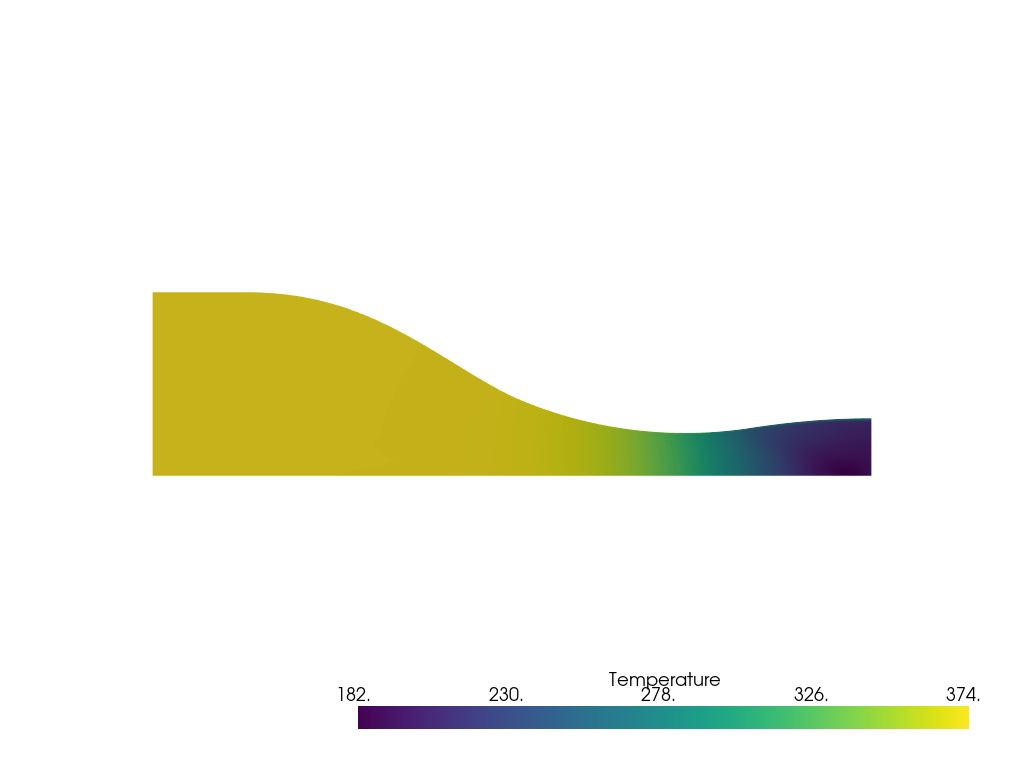

In [ ]:
p = pv.Plotter()
p.add_mesh(vtu, scalars='Temperature')
p.show(cpos='xy')

In [ ]:
vtu.bounds

(0.0, 0.2540000081062317, 0.0, 0.022658376023173332, 0.0, 0.0)